# Stock Market Data collection with RapidAPI
[RapidAPI Link](https://rapidapi.com/)

### API used - Alpha Vantage
[https://rapidapi.com/alphavantage/api/alpha-vantage](https://rapidapi.com/alphavantage/api/alpha-vantage)

In [1]:
%pip install python-dotenv plotly nbformat

Note: you may need to restart the kernel to use updated packages.


### Load the api key

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import os
api_key = os.getenv("API_KEY")

### 1. Searching the stock symbol

In [5]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [6]:
type(data)

dict

In [7]:
data["bestMatches"]

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

In [8]:
# create a blank dictionary
data2 = {}

# Apply for loop 
for i in data["bestMatches"]:
    symbol = i["1. symbol"]
    data2[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]

# View the dictionary
data2

{'SBIN.BSE': ['State Bank of India', 'India/Bombay', 'INR'],
 'SBKFF': ['State Bank of India', 'United States', 'USD'],
 'SID.FRK': ['State Bank of India', 'Frankfurt', 'EUR'],
 'SBID.LON': ['State Bank of India GDR', 'United Kingdom', 'USD']}

### Get daily stock data for SBIN.BSE

In [9]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data3 = response.json()

data3

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-01-29',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-01-29': {'1. open': '752.5000',
   '2. high': '760.2500',
   '3. low': '749.8000',
   '4. close': '758.7000',
   '5. volume': '379821'},
  '2025-01-28': {'1. open': '756.2000',
   '2. high': '759.6000',
   '3. low': '745.6500',
   '4. close': '751.6500',
   '5. volume': '794022'},
  '2025-01-27': {'1. open': '740.0000',
   '2. high': '755.3000',
   '3. low': '736.0000',
   '4. close': '749.2000',
   '5. volume': '775011'},
  '2025-01-24': {'1. open': '747.2000',
   '2. high': '753.7500',
   '3. low': '738.8500',
   '4. close': '744.3500',
   '5. volume': '458033'},
  '2025-01-23': {'1. open': '751.9500',
   '2. high': '755.8000',
   '3. low': '743.3000',
   '4. close': '745.9500',
   '5. volume': '235130'},
  '2025-01-22': {'1. open': '762.8500'

In [10]:
data3.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [11]:
data4 = data3["Time Series (Daily)"]

In [12]:
import pandas as pd
df = pd.DataFrame(data4).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-01-29,752.5000,760.2500,749.8000,758.7000,379821
2025-01-28,756.2000,759.6000,745.6500,751.6500,794022
2025-01-27,740.0000,755.3000,736.0000,749.2000,775011
2025-01-24,747.2000,753.7500,738.8500,744.3500,458033
2025-01-23,751.9500,755.8000,743.3000,745.9500,235130
...,...,...,...,...,...
2024-09-11,781.6500,788.0000,765.6500,768.3000,521913
2024-09-10,788.6500,788.9500,777.6500,782.6000,582017
2024-09-09,785.0000,788.0500,771.3000,784.3000,1433332
2024-09-06,813.9000,813.9000,777.0500,782.6000,2498701


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-01-29 to 2024-09-05
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [14]:
# Convert the columns to float
df = df.astype(float)

In [15]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2025-01-29,752.50,760.25,749.80,758.70,379821.0
2025-01-28,756.20,759.60,745.65,751.65,794022.0
2025-01-27,740.00,755.30,736.00,749.20,775011.0
2025-01-24,747.20,753.75,738.85,744.35,458033.0
2025-01-23,751.95,755.80,743.30,745.95,235130.0


In [16]:
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [17]:
df.index

Index(['2025-01-29', '2025-01-28', '2025-01-27', '2025-01-24', '2025-01-23',
       '2025-01-22', '2025-01-21', '2025-01-20', '2025-01-17', '2025-01-16',
       '2025-01-15', '2025-01-14', '2025-01-13', '2025-01-10', '2025-01-09',
       '2025-01-08', '2025-01-07', '2025-01-06', '2025-01-03', '2025-01-02',
       '2025-01-01', '2024-12-31', '2024-12-30', '2024-12-27', '2024-12-26',
       '2024-12-24', '2024-12-23', '2024-12-20', '2024-12-19', '2024-12-18',
       '2024-12-17', '2024-12-16', '2024-12-13', '2024-12-12', '2024-12-11',
       '2024-12-10', '2024-12-09', '2024-12-06', '2024-12-05', '2024-12-04',
       '2024-12-03', '2024-12-02', '2024-11-29', '2024-11-28', '2024-11-27',
       '2024-11-26', '2024-11-25', '2024-11-22', '2024-11-21', '2024-11-19',
       '2024-11-18', '2024-11-14', '2024-11-13', '2024-11-12', '2024-11-11',
       '2024-11-08', '2024-11-07', '2024-11-06', '2024-11-05', '2024-11-04',
       '2024-10-31', '2024-10-30', '2024-10-29', '2024-10-28', '2024-10-25',

In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
df.index

DatetimeIndex(['2025-01-29', '2025-01-28', '2025-01-27', '2025-01-24',
               '2025-01-23', '2025-01-22', '2025-01-21', '2025-01-20',
               '2025-01-17', '2025-01-16', '2025-01-15', '2025-01-14',
               '2025-01-13', '2025-01-10', '2025-01-09', '2025-01-08',
               '2025-01-07', '2025-01-06', '2025-01-03', '2025-01-02',
               '2025-01-01', '2024-12-31', '2024-12-30', '2024-12-27',
               '2024-12-26', '2024-12-24', '2024-12-23', '2024-12-20',
               '2024-12-19', '2024-12-18', '2024-12-17', '2024-12-16',
               '2024-12-13', '2024-12-12', '2024-12-11', '2024-12-10',
               '2024-12-09', '2024-12-06', '2024-12-05', '2024-12-04',
               '2024-12-03', '2024-12-02', '2024-11-29', '2024-11-28',
               '2024-11-27', '2024-11-26', '2024-11-25', '2024-11-22',
               '2024-11-21', '2024-11-19', '2024-11-18', '2024-11-14',
               '2024-11-13', '2024-11-12', '2024-11-11', '2024-11-08',
      

In [20]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
2025-01-29,752.50,760.25,749.80,758.70,379821.0
2025-01-28,756.20,759.60,745.65,751.65,794022.0
2025-01-27,740.00,755.30,736.00,749.20,775011.0
2025-01-24,747.20,753.75,738.85,744.35,458033.0
2025-01-23,751.95,755.80,743.30,745.95,235130.0


In [21]:
df.index.name = "Date"

In [22]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-01-29,752.50,760.25,749.80,758.70,379821.0
2025-01-28,756.20,759.60,745.65,751.65,794022.0
2025-01-27,740.00,755.30,736.00,749.20,775011.0
2025-01-24,747.20,753.75,738.85,744.35,458033.0
2025-01-23,751.95,755.80,743.30,745.95,235130.0


In [23]:
df.to_csv("SBIN.csv")

### Plot the candlestick chart

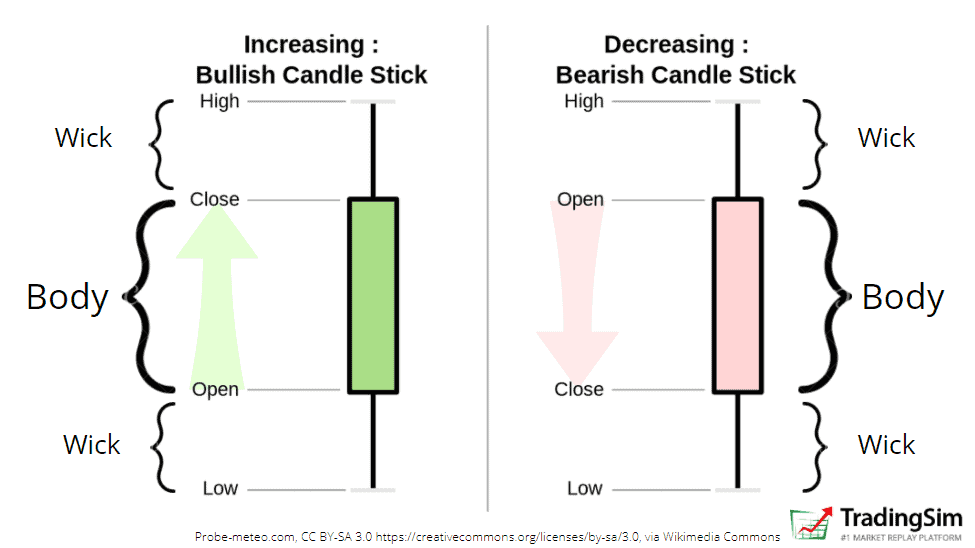

In [24]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure(data = [
    go.Candlestick(
        x = df.index,
        open = df["1. open"],
        high = df["2. high"],
        low = df["3. low"],
        close = df["4. close"]
    )
])

fig.update_layout(width = 1200, height= 800)

fig.show()

In [26]:
type(fig)

plotly.graph_objs._figure.Figure

### Create a class to get stock data for any company

In [38]:
class StockAPI:

    def __init__(self):
        load_dotenv()
        self.api_key = os.getenv("API_KEY")
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers =  {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
        }

    def symbol_search(self, company: str) -> dict:
        querystring = {
            "datatype":"json",
            "keywords": company ,
            "function":"SYMBOL_SEARCH"
        }
        response = requests.get(url, headers=headers, params=querystring)
        data = response.json()
        # create a blank dictionary
        data2 = {}
        # Apply for loop 
        for i in data["bestMatches"]:
            symbol = i["1. symbol"]
            data2[symbol] = [i["2. name"], i["4. region"], i["8. currency"]]
        # Return data2
        return data2
    
    def daily_data(self, symbol: str) -> pd.DataFrame:
        querystring = {
            "function":"TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize":"compact",
            "datatype":"json"
        }
        response = requests.get(url, headers=headers, params=querystring)
        data = response.json()
        df = pd.DataFrame(data["Time Series (Daily)"]).T
        # Convert the data to float
        df = df.astype(float)
        # Convert index to datetime
        df.index = pd.to_datetime(df.index)
        # Add name to index
        df.index.name = "Date"
        return df

    def plotly_chart(self, df: pd.DataFrame) -> go.Figure:
        fig = go.Figure(data = [
            go.Candlestick(
                x = df.index,
                open = df["1. open"],
                high = df["2. high"],
                low = df["3. low"],
                close = df["4. close"]
            )
        ])
        fig.update_layout(width = 1000, height= 800)
        return fig

In [39]:
client = StockAPI()

In [40]:
type(client)

__main__.StockAPI

In [41]:
client.symbol_search("HDFC Bank")

{'HDB': ['HDFC Bank Ltd', 'United States', 'USD'],
 'HDFCBANK.BSE': ['HDFC Bank Limited', 'India/Bombay', 'INR'],
 'H1DB34.SAO': ['HDFC Bank Limited', 'Brazil/Sao Paolo', 'BRL'],
 'HDFA.FRK': ['HDFC Bank Limited', 'Frankfurt', 'EUR']}

In [42]:
df2 = client.daily_data("HDFCBANK.BSE")
df2

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-01-29,1675.00,1681.30,1668.85,1677.10,166662.0
2025-01-28,1644.00,1684.00,1644.00,1670.55,425286.0
2025-01-27,1640.00,1641.60,1626.40,1629.70,87143.0
2025-01-24,1663.95,1670.65,1645.00,1649.55,197152.0
2025-01-23,1682.70,1685.00,1651.75,1664.80,1839586.0
...,...,...,...,...,...
2024-09-12,1648.30,1669.50,1647.35,1666.00,564550.0
2024-09-11,1650.00,1652.20,1639.10,1644.35,230766.0
2024-09-10,1652.40,1654.00,1638.00,1650.60,287723.0


In [43]:
df2.to_csv("HDFCBank.csv")

In [44]:
fig2 = client.plotly_chart(df2)

fig2.show()